## Importing the required dependencies

In [1]:
# Import the numpy library and alias it as np for numerical operations
import numpy as np
# Import the pandas library and alias it as pd for data manipulation
import pandas as pd
# Importing the necessary library for plotting
import matplotlib.pyplot as plt
# Importing the Natural Language Toolkit (NLTK) for text processing
import nltk
# Importing Seaborn for advanced data visualization
import seaborn as sns

## Data Loading

In [2]:
# Load the 'spam.csv' file into a pandas DataFrame named 'df'
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
# Display a random sample of 10 rows from the DataFrame to inspect the data
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1258,ham,Honey boo I'm missing u.,NaN,NaN,NaN
2347,ham,But i dint slept in afternoon.,NaN,NaN,NaN
3632,ham,Hui xin is in da lib.,NaN,NaN,NaN
1497,ham,I'm putting it on now. It should be ready for ...,NaN,NaN,NaN
3934,ham,You need to get up. Now.,NaN,NaN,NaN
5257,ham,"As usual..iam fine, happy &amp; doing well..:)",NaN,NaN,NaN
3005,ham,Also hi wesley how've you been,NaN,NaN,NaN
621,ham,Good words.... But words may leave u in dismay...,NaN,NaN,NaN
5517,ham,Miles and smiles r made frm same letters but d...,NaN,NaN,NaN
3515,ham,"Well, I was about to give up cos they all said...",NaN,NaN,NaN


In [4]:
# Retrieve the dimensions of the DataFrame 'df' as a tuple (rows, columns)
df.shape

(5572, 5)

## Data Cleaning

In [5]:
# Display a concise summary of the DataFrame, including index dtype, columns, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Remove the last three unnamed columns from the DataFrame
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
# Display a random sample of 10 rows from the DataFrame to inspect the data
df.sample(10)

,v1,v2
2309,ham,"I have 2 sleeping bags, 1 blanket and paper an..."
5011,ham,U attend ur driving lesson how many times a wk...
4149,ham,I only work from mon to thurs but Sat i cant l...
4080,ham,Hurry home. Soup is DONE!
3663,ham,Huh? 6 also cannot? Then only how many mistakes?
670,ham,Ho ho - big belly laugh! See ya tomo
658,ham,It doesnt make sense to take it there unless i...
4416,ham,says that he's quitting at least5times a day ...
712,spam,08714712388 between 10am-7pm Cost 10p
935,ham,Then dun wear jeans lor...


In [8]:
# Rename columns 'v1' to 'target' and 'v2' to 'text' for clarity
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
# Display a random sample of 10 rows after renaming columns
df.sample(10)

,target,text
5449,spam,"Latest News! Police station toilet stolen, cop..."
846,ham,My stomach has been thru so much trauma I swea...
373,ham,I cant keep talking to people if am not sure i...
4331,ham,ALSO TELL HIM I SAID HAPPY BIRTHDAY
2999,ham,Id onluy matters when getting on from offcampus
4308,ham,He dint tell anything. He is angry on me that ...
1975,ham,Delhi and chennai still silent.
4836,ham,....photoshop makes my computer shut down.
2124,ham,Beautiful Truth against Gravity.. Read careful...
1988,ham,"Sorry, I'll call later"


In [9]:
# Import LabelEncoder from scikit-learn for encoding categorical labels
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
encoder = LabelEncoder()

In [10]:
# Apply the encoder to the 'target' column to convert labels to numeric values
df['target'] = encoder.fit_transform(df['target'])

In [11]:
# Display the first 5 rows of the DataFrame to verify the encoding
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Check for missing values in each column
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# Check for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(403)

In [14]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

In [15]:
# Verify that duplicates have been removed
df.duplicated().sum()

np.int64(0)

In [16]:
# Display the dimensions of the DataFrame (rows, columns)
df.shape

(5169, 2)

## EDA

In [17]:
# Display the first 5 rows of the DataFrame to inspect the data structure
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Count the occurrences of each unique value in the 'target' column (0: ham, 1: spam)
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

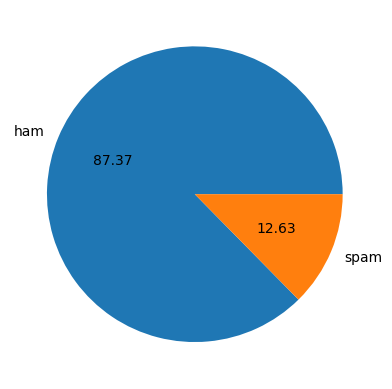

In [19]:
# Create a pie chart to visualize the distribution of 'ham' and 'spam' messages
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced

In [21]:
# Install NLTK library (ensure this is done in your environment)
!pip install nltk

# Download the 'punkt' tokenizer models from NLTK
nltk.download('punkt')


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to C:\Users\SYED SARAFEENA
[nltk_data]     ALI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Add a new column 'num_characters' to the DataFrame representing the number of characters in each message
df['num_characters'] = df['text'].apply(len)

# Display the first 5 rows to verify the new column
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# Add a new column 'num_words' representing the number of words in each message
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Display the first 5 rows to verify the new column
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# Add a new column 'num_sentences' representing the number of sentences in each message
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Display the first 5 rows to verify the new column
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
# Generate descriptive statistics for 'num_characters', 'num_words', and 'num_sentences'
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# Generate descriptive statistics for 'ham' messages (target == 0)
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# Generate descriptive statistics for 'spam' messages (target == 1)
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

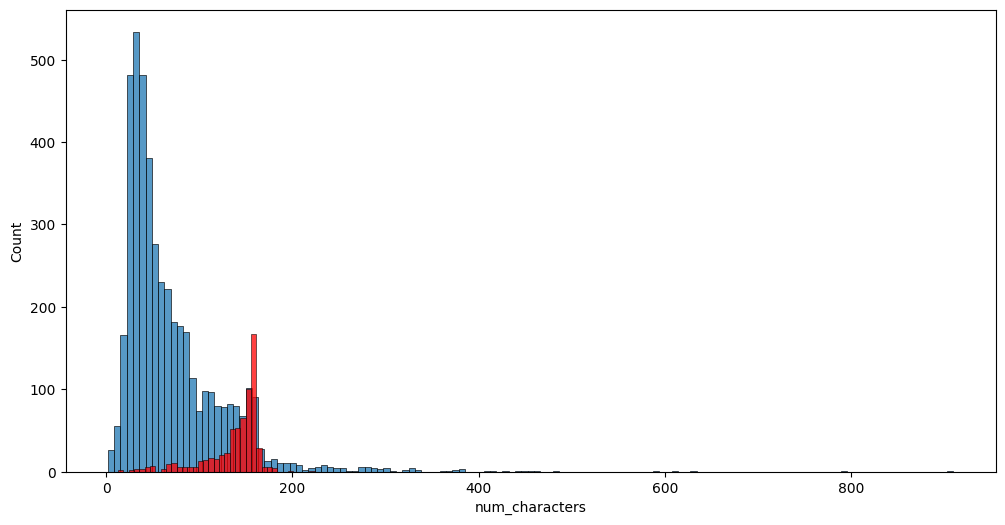

In [28]:
# Set the figure size for the histograms
plt.figure(figsize=(12, 6))

# Plot histograms for 'num_characters' for 'ham' messages
sns.histplot(df[df['target'] == 0]['num_characters'])

# Plot histograms for 'num_characters' for 'spam' messages with a different color
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

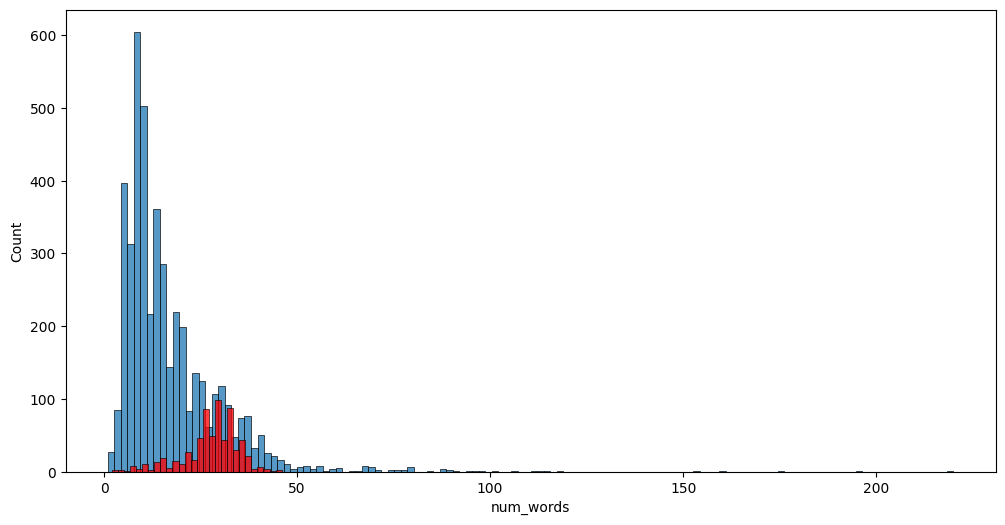

In [29]:
# Set the figure size for the histograms
plt.figure(figsize=(12, 6))

# Plot histograms for 'num_words' for 'ham' messages
sns.histplot(df[df['target'] == 0]['num_words'])

# Plot histograms for 'num_words' for 'spam' messages with a different color
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

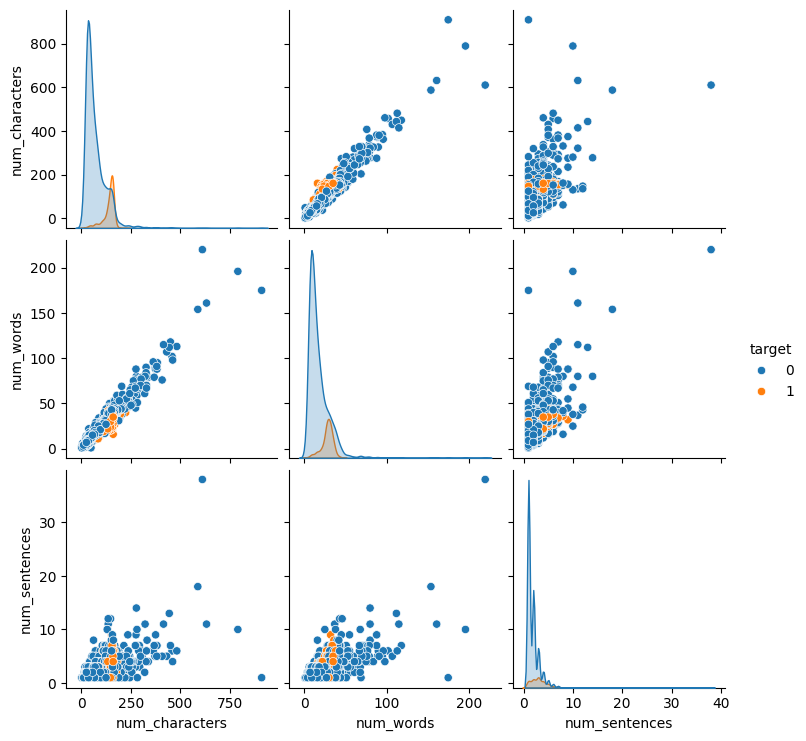

In [30]:
# Create pairwise plots to visualize relationships between variables, colored by 'target'
sns.pairplot(df, hue='target')

In [31]:
# Generate a heatmap to visualize correlations between numerical features

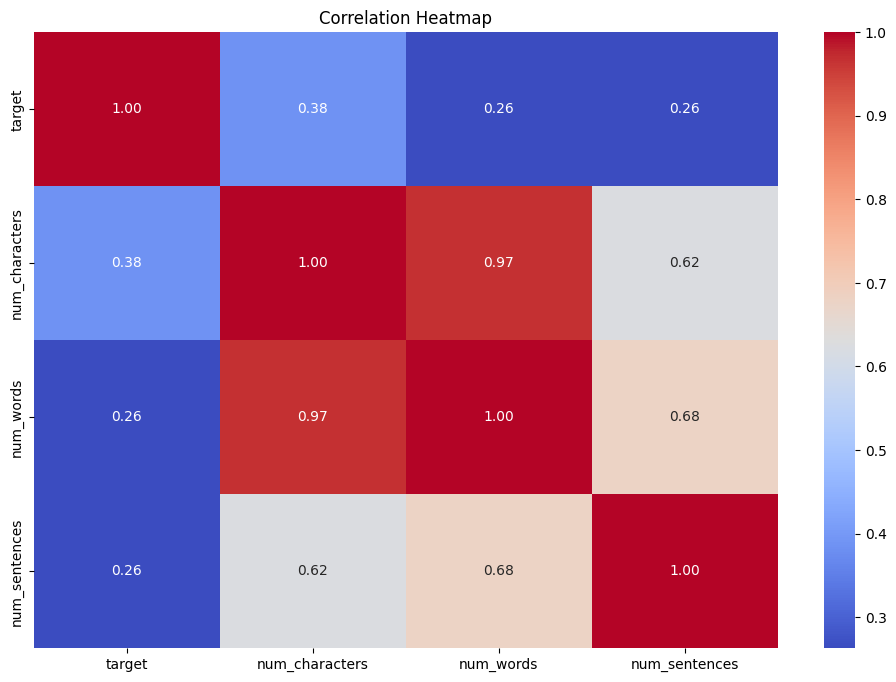

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Text Pre-Processing

In [33]:
import nltk  
from nltk.corpus import stopwords             # for getting the list of English stop-words :contentReference[oaicite:0]{index=0}  
import string                                  # for string.punctuation  
from nltk.stem.porter import PorterStemmer  
ps = PorterStemmer()                           # initialize the Porter Stemmer  

nltk.download('punkt')                          # ensure tokenizer models are available  
nltk.download('stopwords')                       # ensure stop-words list is available

[nltk_data] Downloading package punkt to C:\Users\SYED SARAFEENA
[nltk_data]     ALI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SYED SARAFEENA
[nltk_data]     ALI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
def transform_text(text):
    # Convert the entire text to lowercase to normalize the casing
    text = text.lower()
    
    # Tokenize the lowercase text into individual word-tokens using NLTK
    text = nltk.word_tokenize(text)
    
    # Initialize an empty list y to collect alphanumeric tokens
    y = []
    for i in text:
        # Append token to y only if it is alphanumeric (i.e., no pure punctuation)
        if i.isalnum():
            y.append(i)
    
    # Make a copy of the filtered tokens (just alphanumeric) into text 
    text = y[:]
    # Clear y for the next filtering step
    y.clear()
    
    # Remove stopwords and punctuation tokens
    for i in text:
        # Include the token if it is not a stopword and not punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # Make another copy into text for stemming
    text = y[:]
    # Clear y again for the last step
    y.clear()
    
    # Apply stemming: reduce each token to its root/stem form
    for i in text:
        y.append(ps.stem(i))
    
    # Join all the processed tokens back into a single string separated by spaces
    return " ".join(y)

In [35]:
# Example usage of the function
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
# Display the value in the 'text' column at index 10 for inspection
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [37]:
# Import the PorterStemmer class from NLTK for word-stemming
from nltk.stem.porter import PorterStemmer
# Create an instance of the Porter stemmer
ps = PorterStemmer()  
# Apply stemming to the word 'loving' to reduce it to its root form
ps.stem('loving')

'love'

In [38]:
# Create a new column 'transformed_text' by applying the transform_text function to each value in the 'text' column
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
# Display the first 5 rows of the DataFrame to verify the addition of the new column
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
# Import the WordCloud class from the wordcloud library for generating word-cloud visualizations
from wordcloud import WordCloud

# Instantiate a WordCloud object with custom width, height, minimum font size and white background
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate a word cloud for spam messages: concatenate all 'transformed_text' where target == 1 into a single string and feed to WordCloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

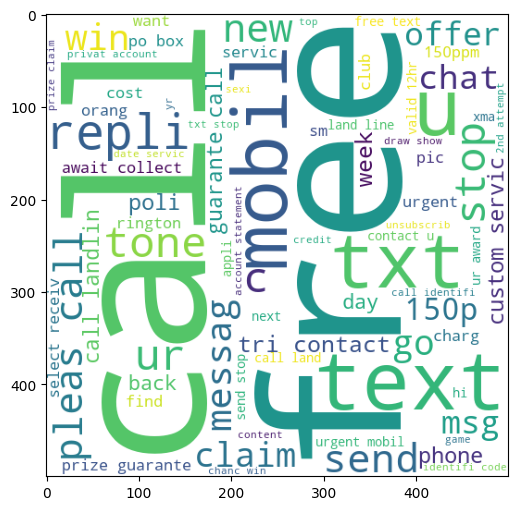

In [41]:
# Create a figure for display and show the generated spam word cloud
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
# Note: Optionally disable axes – plt.axis("off")

In [42]:
# Generate a word cloud for non-spam (“ham”) messages similarly
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

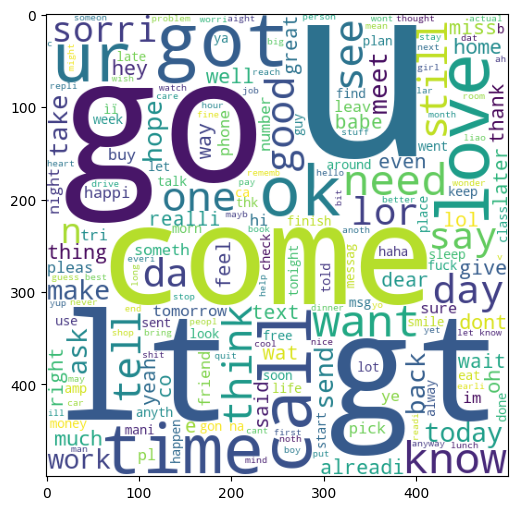

In [43]:
# Display the ham word cloud
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
# plt.axis("off")  # hide the axes for cleaner look
# plt.show()

In [44]:
# Show the first few rows of the DataFrame to verify columns and transformations
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
# Build a corpus (list) of all individual words from transformed spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Print the length (number of words) in the spam corpus to get a sense of its size
len(spam_corpus)

9939

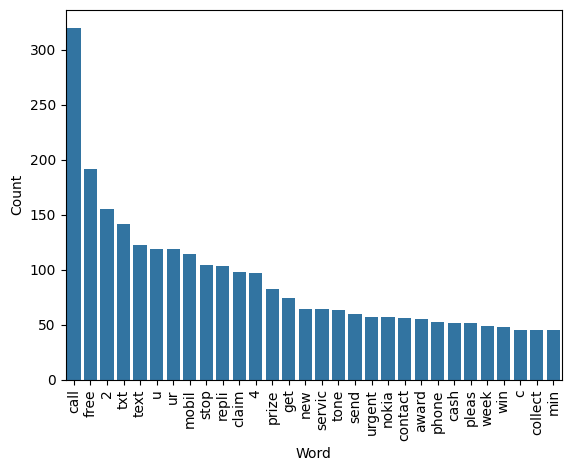

In [46]:
# Import Counter for counting word frequencies
from collections import Counter
from collections import Counter

# Create a DataFrame from the top 30 most common words in the spam corpus
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create a barplot
sns.barplot(x='Word', y='Count', data=word_counts)

# Rotate x-labels for readability
plt.xticks(rotation='vertical')
plt.show()

In [47]:
# Build a corpus for the ham class in the same way
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Print size of the ham corpus
len(ham_corpus)

35404

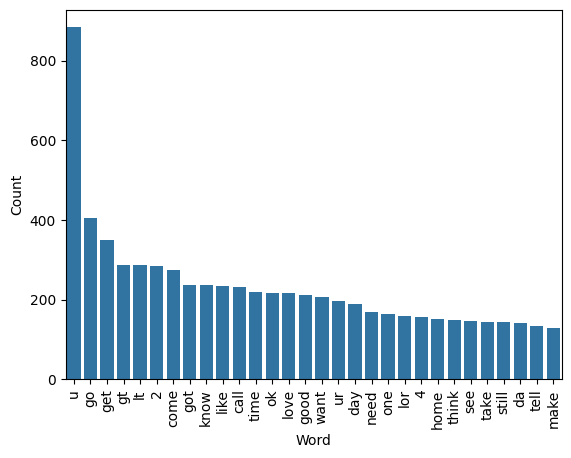

In [48]:
# Create a DataFrame from the top 30 most common words in the ham corpus
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create a barplot
sns.barplot(x='Word', y='Count', data=word_counts)

# Rotate x-labels for readability
plt.xticks(rotation='vertical')
plt.show()

In [49]:
# Text Vectorization → next step
# Using Bag of Words (BoW) approach for converting text into numerical features
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building and Evaluation

In [50]:
# Import vectorizer classes from scikit-learn for converting text to numerical features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Instantiate a CountVectorizer (bag-of-words) object (default settings)
cv = CountVectorizer()

# Instantiate a TfidfVectorizer object, limited to the top 3000 most frequent features
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
# Transform the ‘transformed_text’ column into TF-IDF feature vectors and convert to dense array
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
# Normalising features, adding ‘num_characters’ as another feature
# Optional code:-
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X = np.hstack(( X, df['num_characters'].values.reshape(-1,1) ))

In [53]:
# Show the shape of the feature matrix X (number of samples and number of features)
X.shape

(5169, 3000)

In [54]:
# Extract the target labels into an array y
y = df['target'].values

In [55]:
# Import train_test_split function for splitting data into training and test sets
from sklearn.model_selection import train_test_split

In [56]:
# Split X and y into training (80 %) and test (20 %) sets, setting a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [57]:
# Import various Naive Bayes classifier types and evaluation functions
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [58]:
# Instantiate the three Naive Bayes models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
# Train the GaussianNB on the training data
gnb.fit(X_train, y_train)
# Predict on test data
y_pred1 = gnb.predict(X_test)
# Print accuracy, confusion matrix and precision for GaussianNB
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [60]:
# Train the MultinomialNB on the training data
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
# Print the metrics for MultinomialNB
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [61]:
# Train the BernoulliNB on the training data
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
# Print the metrics for BernoulliNB
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [62]:
# tfidf --> MNB

In [63]:
# Import a broader set of classification algorithms for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
# Instantiate each classifier with chosen hyperparameters
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [65]:
# Create a dictionary of classifier name → classifier instance for looping
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [66]:
# Define a helper function to train a given classifier and return accuracy & precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [67]:
# Example: train the SVC classifier and get its performance
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [68]:
# Initialize lists to store performance metrics for each algorithm
accuracy_scores = []
precision_scores = []

# Loop through each classifier, train it and collect its metrics
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9487179487179487


In [69]:
# Create a DataFrame to summarise performance across algorithms and sort by precision
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

In [70]:
# Display
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.930368,0.830000


In [71]:
# Melt the DataFrame so we can use it for seaborn plotting (long format)
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [72]:
# Display
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.930368


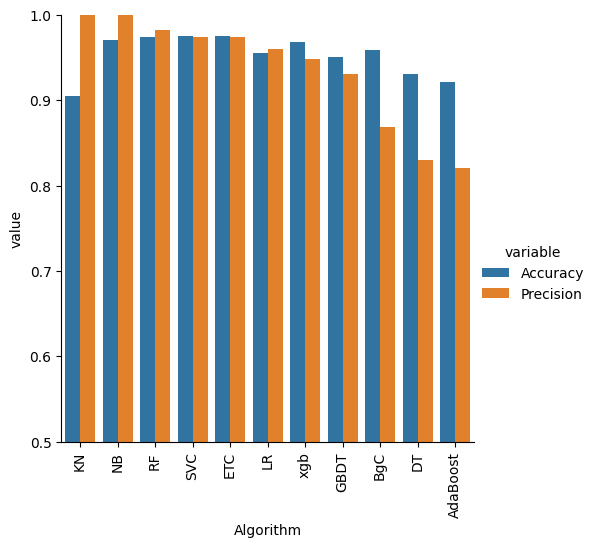

In [73]:
# Create a bar chart of performance metrics (accuracy & precision) across algorithms
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)  # set y-axis limits
plt.xticks(rotation='vertical')  # rotate algorithm labels for readability
plt.show()

## Model Improvement

In [74]:
# Change the max_features parameter of TfIdf

In [75]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

In [76]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
}).sort_values('Precision_scaling', ascending=False)

In [77]:
# Merge performance results of earlier models with this new metric dataset
new_df = performance_df.merge(temp_df, on='Algorithm')
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [78]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
}).sort_values('Precision_num_chars', ascending=False)

In [79]:
# Merge again to compare algorithms when including number of characters as a feature
new_df_scaled.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,xgb,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.930368,0.830000,0.930368,0.830000,0.930368,0.830000,0.930368,0.830000


In [80]:
# Voting Classifier: ensemble of chosen classifiers
# Support Vector Classifier with probability estimates
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
# Multinomial Naive Bayes classifier
mnb = MultinomialNB()  
# Extra Trees ensemble classifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2) 

In [81]:
from sklearn.ensemble import VotingClassifier
# Create a soft voting ensemble combining svc, mnb and etc.
voting = VotingClassifier(
    estimators=[('svm', svc), ('nb', mnb), ('et', etc)],
    voting='soft'  # 'soft' means we use predicted probabilities of each classifier and select class with highest average probability. :contentReference[oaicite:0]{index=0}
)

In [82]:
# train ensemble on training data
voting.fit(X_train, y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [83]:
# predict on test set
y_pred = voting.predict(X_test)  
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [84]:
# Applying Stacking Classifier: another ensemble technique that uses a meta-estimator to combine base learners
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()  # meta-learner

In [85]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

In [86]:
# train stacking classifier
clf.fit(X_train, y_train)  
# predict on test set
print("Accuracy", accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_test) 
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9796905222437138
Precision 0.9393939393939394


In [87]:
import pickle

# Save the TfidfVectorizer to a file
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the Multinomial Naive Bayes model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)